In [1]:
import random
import numpy as np 
from functools import reduce 
#import matplotlib.pyplot as plt
from similarity import *
from transformation import *
import tools
import simGen
from copy import deepcopy
import importlib as ip
ip.reload(tools)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<module 'tools' from 'c:\\Users\\user2\\Documents\\Stage\\Code\\simTree\\tools.py'>

In [ ]:

from simTree import SimTree
def test(sim_trees : list[SimTree], dataset : list[list[tuple[str,str]]], threshold : float, method : str = "combination", **kwarg) -> list[float]:
    d1,d2 = dataset
    nb_comp = 0
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    if method == "combination":

        for index1,mapping1 in enumerate(zip(d1,d2)):
            db_entity = list(map(lambda x:x[0],mapping1))
            for index2,mapping2 in enumerate(zip(d1,d2)):
                wk_entity = list(map(lambda x:x[1],mapping2))
                sim = []
                for tree,db,wk in zip(sim_trees,db_entity,wk_entity):
                    tree.set_leafs_value([db,wk])
                    sim.append(tree.compute())
                    nb_comp +=1
                if np.mean(sim) >= threshold:
                    if index1 == index2:
                        tp += 1
                    else: #index1 != index2 => not a true mapping
                        fp += 1
                else:
                    if index1 != index2:
                        tn += 1
                    else:
                        fn += 1
    elif method == "permutation":
        nb_permutation = n if (n := kwarg.get("nb_permutation")) else 1


    print(tp,fp,tn,fn,nb_comp)
    accuracy = tp / (tp+fn)
    recall   = tp / (tp+fp) if tp else 0

    return [accuracy,recall]




def genetic_algo(dataset : list[tuple[str,str]], nb_positives : int, nb_negatives : int, params_algo : dict = None, plot_img_path : str = ""):

    jaro = similarity_functions()[-1]
    negatives = tools.generate_NegativeSample(list(map(lambda x: [x] ,dataset)),jaro)


    negative_dataset = np.array(negatives)[np.random.choice(np.arange(0,len(negatives)),nb_negatives)].tolist()
    positive_dataset = np.array(dataset)[np.random.choice(np.arange(0,len(dataset)),nb_positives)].tolist()
    if not(param_algo):   
        param_algo = {
            "population_size" : nb_positives,
            "nb_generation"   : 30,
            "proba_selection" : 0.4,
            "proba_crossover" : 0.2,
            "proba_mutation"  : 0.35,
            "size_regularisation" : 0.3,
            "negative_sampling_regularisation" : 0.8,

            "top_k" : 15,
            "threshold" : 0.95
            
        }
    
    param_data = {
        "tree_max_depth" : 10,
        "similarity_functions" : similarity_functions(),
        "transformation_functions" : transformation_functions(),
        "values" : positive_dataset,
        "negatives_values" : negative_dataset
    }

    sim = simGen.SimGen(param_algo,param_data)
    sim.evolve_population()
    
    tools.plot_stats_sim(sim, plot_img_path)
    best_trees = tools.get_best_tree(sim)

    return sim, best_trees



#TODO not compare values but entities 
N = 1000
isbn_dataset = tools.generate_dataset(db_prop="isbn",wk_prop="P957",size=N)
sim_isbn, best_trees_isbn = genetic_algo(isbn_dataset,100,50, "img/isbn/100pop_50neg_30gen")

release_dataset = tools.generate_dataset(db_prop="releaseDate",wk_prop="P577",size=N)
sim_releaseDate, best_trees_releaseDate = genetic_algo(release_dataset,100,50,"img/release_date/100pop_50neg_30genb")
acc,recall = test(sim_trees=[best_trees_isbn[0],best_trees_releaseDate[0]],dataset=[isbn_dataset,release_dataset],threshold=0.7)
print(f"accuracy = {acc}, recall = {recall}")

In [ ]:

    
N = 1000
value_release_date = tools.generate_dataset(db_prop="releaseDate",wk_prop="P577",size=N)

jaro = similarity_functions()[-1]
negatives = tools.generate_NegativeSample(list(map(lambda x: [x] ,value_release_date)),jaro)

N_positives = 100
N_negative = int(N_positives/2)
negative_dataset = np.array(negatives)[np.random.choice(np.arange(0,len(negatives)),N_negative)].tolist()
dataset = np.array(value_release_date)[np.random.choice(np.arange(0,len(value_release_date)),N)].tolist()

param_algo = {
    "population_size" : N_positives,
    "nb_generation"   : 5,
    "proba_selection" : 0.4,
    "proba_crossover" : 0.2,
    "proba_mutation"  : 0.35,
    "size_regularisation" : 0.3,
    "negative_sampling_regularisation" : 0.8,

    "top_k" : 15,
    "threshold" : 0.95
    
}

param_data = {
    "tree_max_depth" : 10,
    "similarity_functions" : similarity_functions(),
    "transformation_functions" : transformation_functions(),
    "values" : value_release_date,
    "negatives_values" : negative_dataset
}

sim = simGen.SimGen(param_algo,param_data)
sim.evolve_population()
img_path = "img/release_date/100pop_50neg_30genbis"
tools.plot_stats_sim(sim,"")
best_trees_releaseDate = tools.get_best_tree(sim)


In [13]:
max(sim.freq_sf[-1].values,key=lambda x:x[1])

TypeError: 'builtin_function_or_method' object is not iterable

In [2]:
similarity_functions()

[<function similarity.jaccard_similarity(x: str, y: str) -> float>,
 <function similarity.cos_similarity(x: str, y: str)>,
 <function similarity.damerau_levenshtein_dist_similarity(x: str, y: str) -> float>,
 <function similarity.jaro_similarity(x: str, y: str) -> float>]

In [47]:
ip.reload(tools)

N = 1000
d1 = tools.generate_dataset(db_prop="releaseDate",wk_prop="P577",size=N)
d2 = tools.generate_dataset(db_prop="isbn",wk_prop="P957",size=N)

jaro = similarity_functions()[-1]
cos = similarity_functions()[1]
negatives,keys = tools.generate_NegativeSample(list(zip(d1,d2)),[jaro,jaro], size = 50)


In [23]:
ip.reload(tools)
negatives,keys = tools.generate_NegativeSample(list(zip(d1,d2)),[jaro,jaro], size = 50)

SyntaxError: invalid syntax (382351032.py, line 5)

In [55]:
key = [d1,d2]
neg = [list() for i in range(len(key))]
for e in negatives:
    for index,_ in enumerate(key):
        neg[e[0]].append(e[1])

In [59]:
neg[0]

[('2003-01-14', '2013-09-12T00:00:00Z'),
 ('2003-01-14', '2013-09-12T00:00:00Z'),
 ('2003-01-14', '2006-01-01T00:00:00Z'),
 ('2003-01-14', '2006-01-01T00:00:00Z'),
 ('2005-11-17', '2000-11-01T00:00:00Z'),
 ('2005-11-17', '2000-11-01T00:00:00Z'),
 ('2005-11-17', '2015-01-01T00:00:00Z'),
 ('2005-11-17', '2015-01-01T00:00:00Z'),
 ('2005-11-17', '2009-11-13T00:00:00Z'),
 ('2005-11-17', '2009-11-13T00:00:00Z'),
 ('1999-02-22', '1999-02-15T00:00:00Z'),
 ('1999-02-22', '1999-02-15T00:00:00Z'),
 ('2000-10-01', '2013-09-12T00:00:00Z'),
 ('2000-10-01', '2013-09-12T00:00:00Z'),
 ('1986-04-21', '1986-10-21T00:00:00Z'),
 ('1986-04-21', '1986-10-21T00:00:00Z'),
 ('1986-04-21', '1926-08-19T00:00:00Z'),
 ('1986-04-21', '1926-08-19T00:00:00Z'),
 ('1986-04-21', '1998-04-21T00:00:00Z'),
 ('1986-04-21', '1998-04-21T00:00:00Z'),
 ('1950-09-04', '1993-04-16T00:00:00Z'),
 ('1950-09-04', '1993-04-16T00:00:00Z'),
 ('1950-09-04', '1993-05-04T00:00:00Z'),
 ('1950-09-04', '1993-05-04T00:00:00Z'),
 ('1950-09-04', 

Best sim tree score
0.3198487179487117 ['jaro_similarity', ['remove_punctuation', '0-688-07632-7'], ['flatten', '0-19-913130-9']]
0.3198487179487117 ['jaro_similarity', ['remove_punctuation', '0-688-07632-7'], ['flatten', '0-19-913130-9']]
0.3198487179487117 ['jaro_similarity', ['remove_punctuation', '0-688-07632-7'], ['identity', '0-19-913130-9']]
0.3198487179487117 ['jaro_similarity', ['remove_punctuation', '0-688-07632-7'], ['identity', '0-19-913130-9']]
0.3198487179487117 ['jaro_similarity', ['remove_punctuation', '0-688-07632-7'], ['lowercase', '0-19-913130-9']]

Best sim tree similarity
0.7692404761904823 ['jaro_similarity', ['tokenize', '0-688-07632-7'], ['lowercase', '0-19-913130-9']]
0.7692404761904823 ['jaro_similarity', ['uppercase', '0-688-07632-7'], ['strip_whitespace', '0-19-913130-9']]
0.7692404761904823 ['jaro_similarity', ['tokenize', '0-688-07632-7'], ['identity', '0-19-913130-9']]
0.7692404761904823 ['jaro_similarity', ['tokenize', '0-688-07632-7'], ['tokenize', '0-1

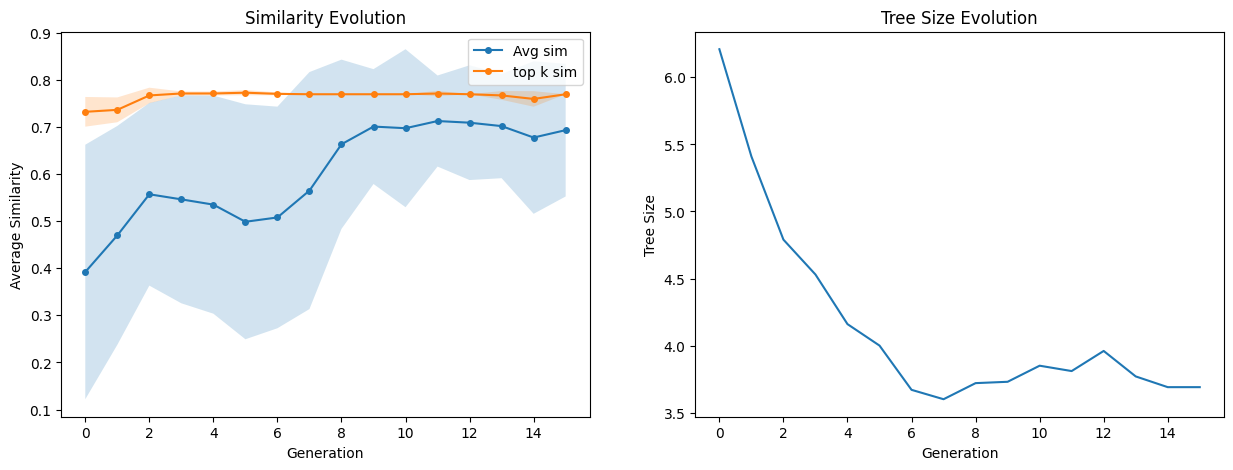

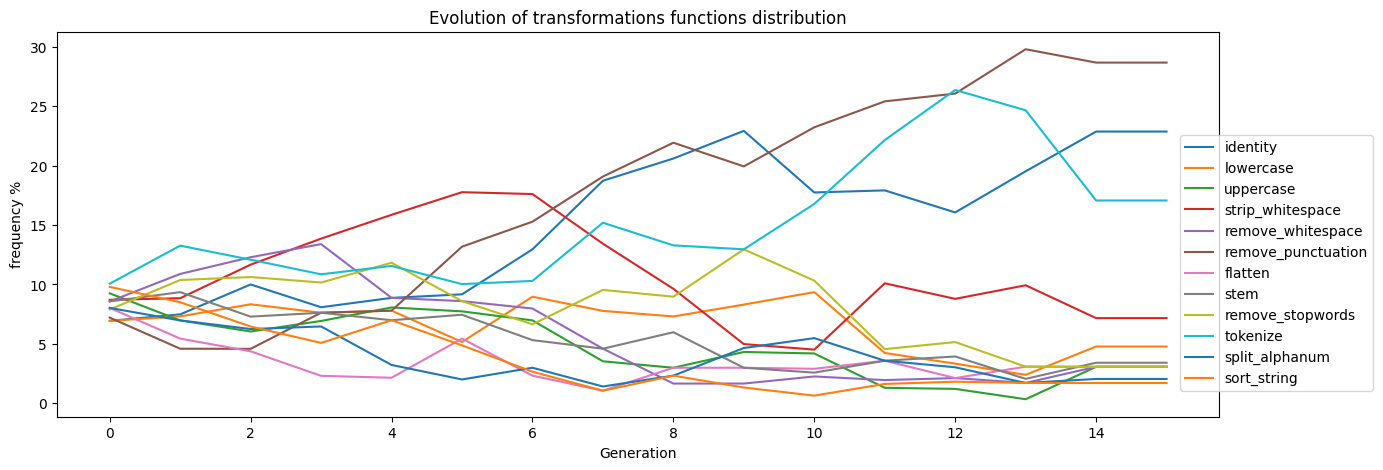

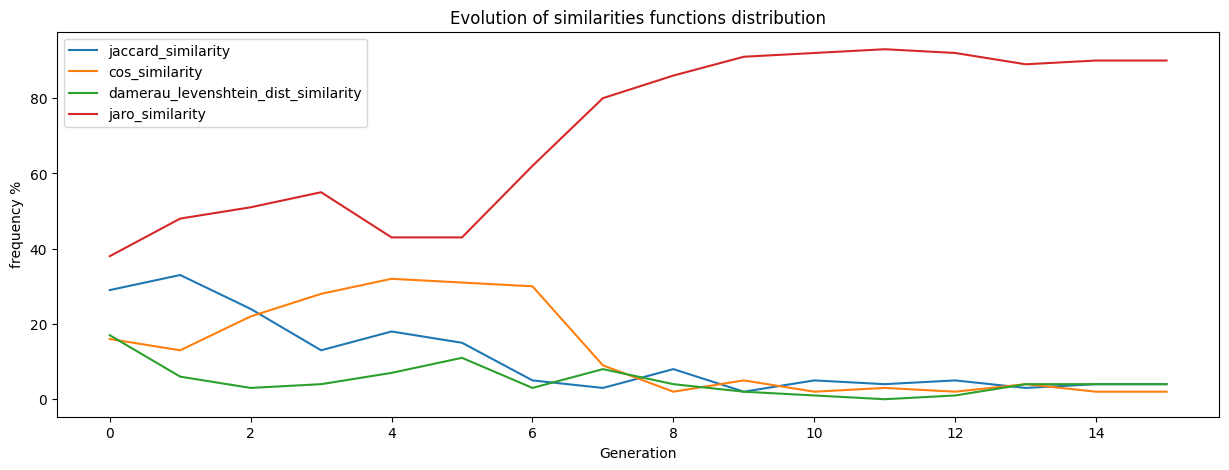

In [8]:
N = 1000
value_isbn = tools.generate_dataset(db_prop="isbn",wk_prop="P957",size=N)

jaro = similarity_functions()[-1]
negatives = tools.generate_NegativeSample(list(map(lambda x: [x] ,value_isbn)),jaro)

N = 100
negative_dataset = negatives[100:150]
dataset = value_isbn[100:200]

param_algo = {
    "population_size" : N,
    "nb_generation"   : 15,
    "proba_selection" : 0.4,
    "proba_crossover" : 0.25,
    "proba_mutation"  : 0.3,
    "size_regularisation" : 0.3,
    "negative_sampling_regularisation" : 0.8,

    "top_k" : 15,
    "threshold" : 0.95
    
}

param_data = {
    "tree_max_depth" : 10,
    "similarity_functions" : similarity_functions(),
    "transformation_functions" : transformation_functions(),
    "values" : value_release_date,
    "negatives_values" : negative_dataset
}

sim = simGen.SimGen(param_algo,param_data)
sim.evolve_population()
tools.plot_stats_sim(sim,"img/isbn/100pop_50neg_15gen")
best_trees_isbn = tools.get_best_tree(sim)


In [22]:
with open("best_tree_release_isbn.txt","w") as f:
    for i in best_trees_isbn:
        f.write(str(i)+"\n")
    for i in best_trees_releaseDate:
        f.write(str(i)+"\n")

78 3 9897 22 20000
accuracy = 0.78, recall = 0.9629629629629629


In [2]:
def genetic_algo(dataset : list[tuple[str,str]], nb_positives : int, negative_sampling : bool = False, param_algo : dict = None, plot_img_path : str = ""):
    positive_dataset = np.array(dataset)[np.random.choice(np.arange(0,len(dataset)),nb_positives)].tolist()

    if not(param_algo):   
        param_algo = {
            "population_size" : nb_positives,
            "nb_generation"   : 30,
            "proba_selection" : 0.4,
            "proba_crossover" : 0.2,
            "proba_mutation"  : 0.35,
            "size_regularisation" : 0.3,
            "negative_sampling_regularisation" : 0.8,
            "top_k" : 15,
            "tree_max_depth" : 10,
            "threshold" : 0.95
            
        }

    param_data = {
        "similarity_functions" : similarity_functions(),
        "transformation_functions" : transformation_functions(),
        "values" : positive_dataset,
        "negatives_values" : []
    }

    #need to generate negative sampling
    if negative_sampling:
        nb_negative_example = 50
        negative_param_algo = deepcopy(param_algo)
        negative_param_algo["nb_generation"] = 5
        neg_sim = simGen.SimGen(negative_param_algo,param_data)
        neg_sim.evolve_population()
        supposed_best_sim_function = get_tf_function_from_name(max(neg_sim.freq_tf[-1])) #get most frequent sim function for the last generation
        negatives = tools.generate_NegativeSample(list(map(lambda x: [x] ,dataset)),supposed_best_sim_function)
        negative_dataset = np.array(negatives)[np.random.choice(np.arange(0,len(negatives)),nb_negative_example)].tolist()
        param_data["negatives_values"] = negative_dataset        

    sim = simGen.SimGen(param_algo,param_data)
    sim.evolve_population()
    tools.plot_stats_sim(sim, plot_img_path)
    best_trees = tools.get_best_tree(sim)

    return sim, best_trees




Best sim tree score
0.6957616345949957 ['cos_similarity', ['remove_whitespace', '0-385-60800-4'], ['stem', '1-56849-673-7']]
0.6957616345949957 ['cos_similarity', ['remove_whitespace', '0-385-60800-4'], ['strip_whitespace', '1-56849-673-7']]
0.6957616345949957 ['cos_similarity', ['remove_whitespace', '0-385-60800-4'], ['strip_whitespace', '1-56849-673-7']]
0.6957616345949957 ['cos_similarity', ['stem', '0-385-60800-4'], ['stem', '1-56849-673-7']]
0.6957616345949957 ['cos_similarity', ['stem', '0-385-60800-4'], ['strip_whitespace', '1-56849-673-7']]

Best sim tree similarity
0.8842511655011652 ['jaccard_similarity', ['split_alphanum', ['remove_stopwords', ['lowercase', ['flatten', '0-385-60800-4']]]], ['split_alphanum', ['lowercase', ['remove_whitespace', ['stem', '1-56849-673-7']]]]]
0.8682818004435647 ['jaro_similarity', ['flatten', '0-385-60800-4'], ['strip_whitespace', '1-56849-673-7']]
0.8682818004435647 ['jaro_similarity', ['flatten', '0-385-60800-4'], ['strip_whitespace', '1-5684

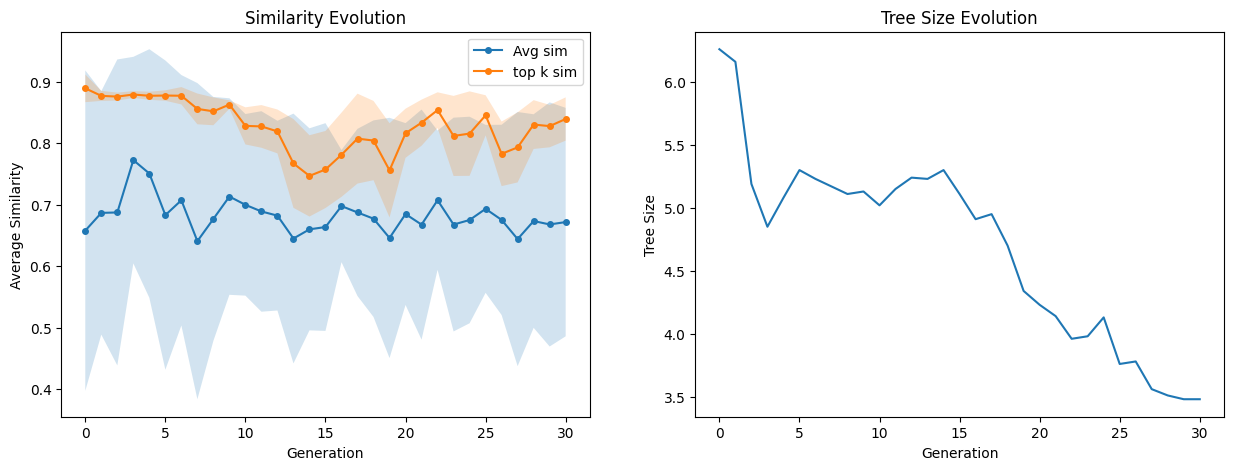

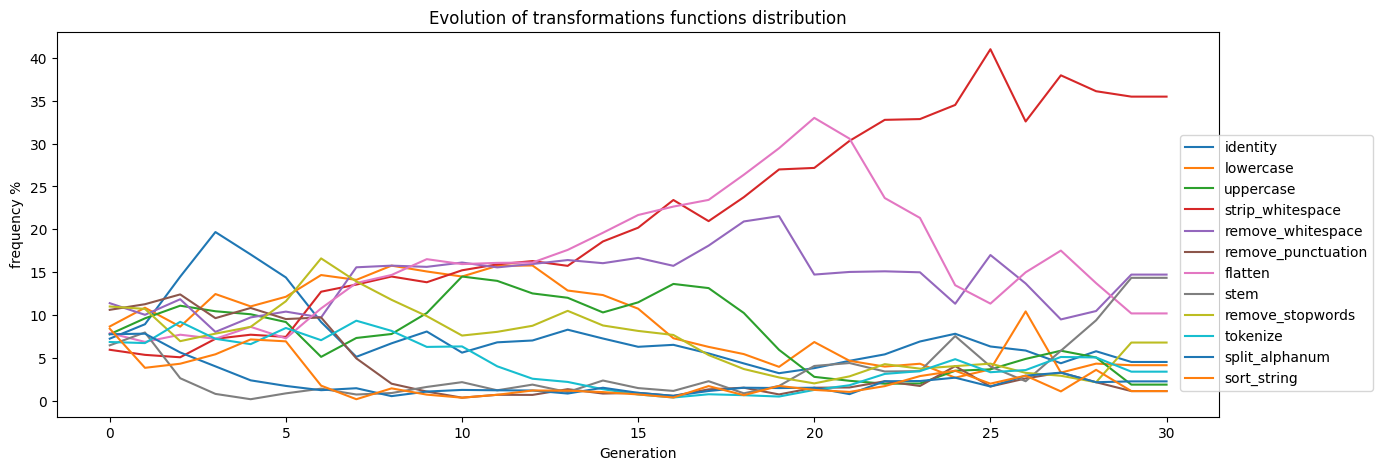

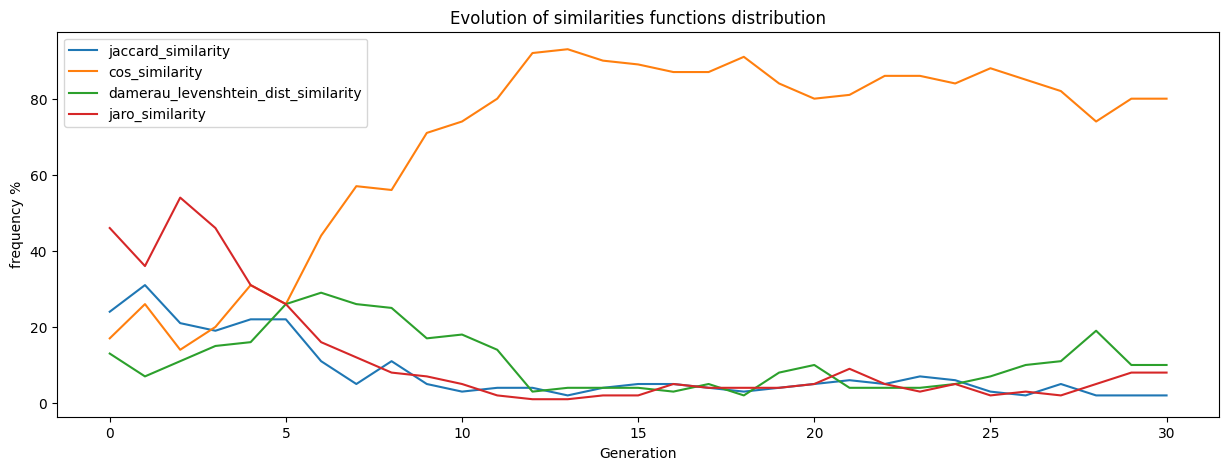

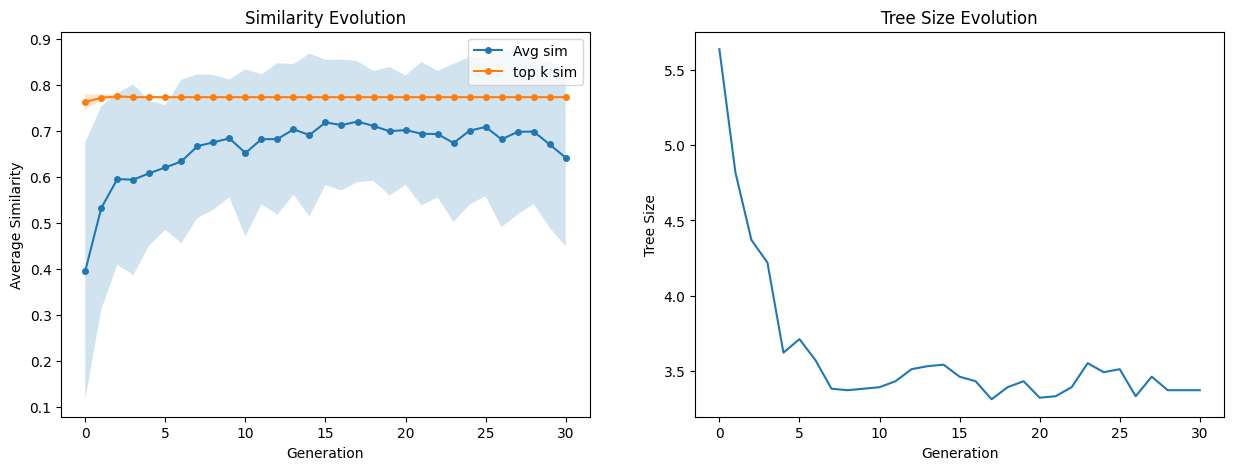

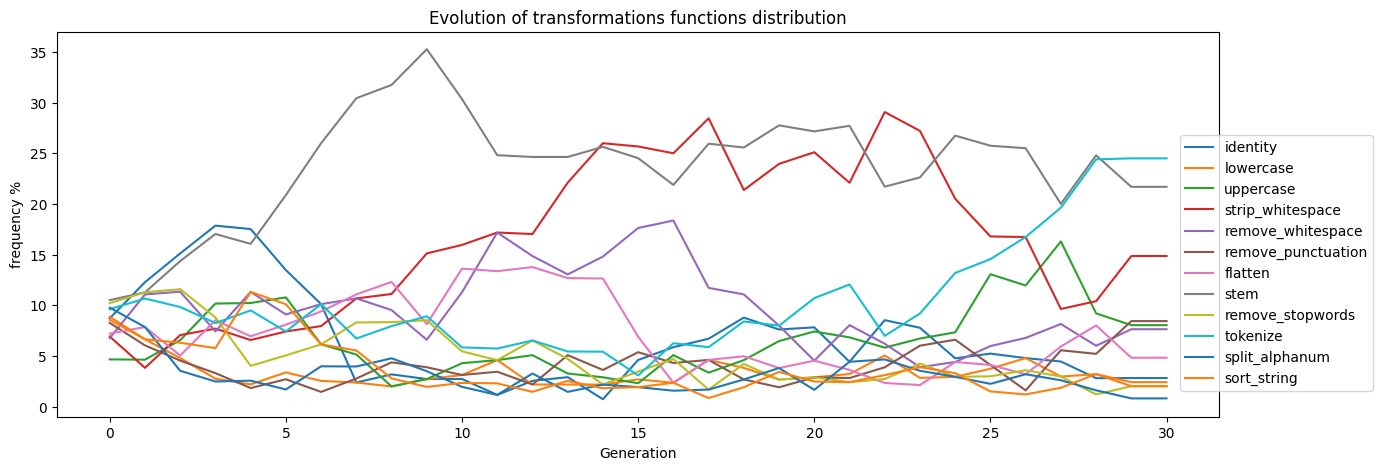

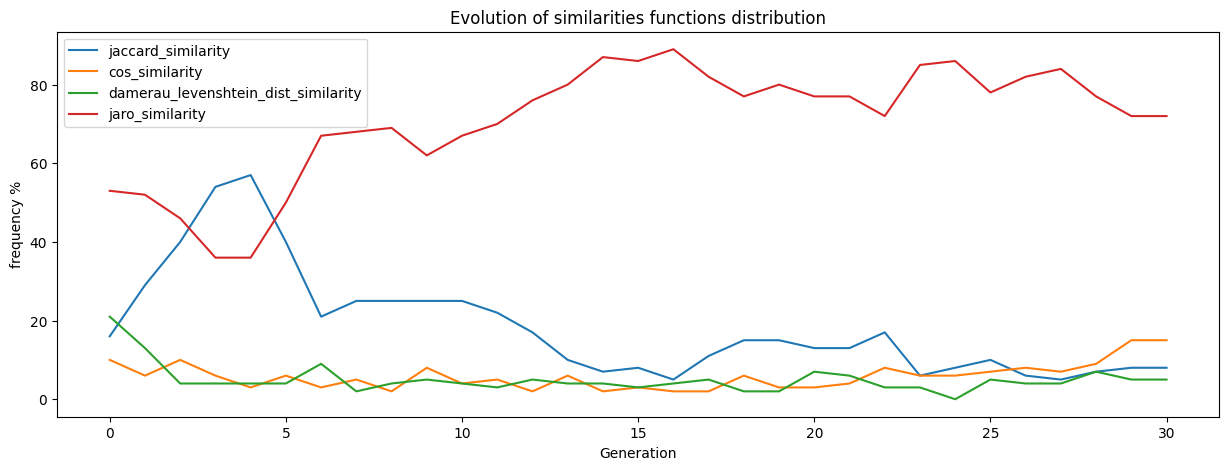

In [3]:
N = 1000
isbn_dataset = tools.generate_dataset(db_prop="isbn",wk_prop="P957",size=N)
sim_isbn, best_trees_isbn = genetic_algo(isbn_dataset,100, True, plot_img_path="img/isbn/100pop")

release_dataset = tools.generate_dataset(db_prop="releaseDate",wk_prop="P577",size=N)
sim_releaseDate, best_trees_releaseDate = genetic_algo(release_dataset,100,True, plot_img_path="img/release_date/100pop")

acc,recall = tools.test_solution(sim_trees=[best_trees_isbn[0],best_trees_releaseDate[0]],dataset=[isbn_dataset,release_dataset],threshold=0.7)
print(f"accuracy = {acc}, recall = {recall}")



In [7]:
a = np.array(np.arange(1,10))
index = [1,2,3,4,5,6]
mask = []
for i in range(len(a)):
    mask.append(i  not in index)
a[mask]

array([1, 8, 9])

In [1]:
import numpy as np

In [23]:
print(mask)
print(np.logical_not(mask))

[True, False, False, False, False, False, False, True, True]
[False  True  True  True  True  True  True False False]


In [3]:
a = np.array([1,2,3,4,5,6,7,8,9])
indexs = np.arange(0,len(a)-1)
train_index = set(np.random.choice(indexs,5))
test_index = set(indexs).difference(train_index)
print(train_index,test_index)


{1, 4, 6, 7} {0, 2, 3, 5}


In [17]:
a = [1,2,3,4,5]
b = ["a","b","c","k","l"]
c = [123,456,789,987,654]

d = [a,b,c]
list(zip(*d))

[(1, 'a', 123), (2, 'b', 456), (3, 'c', 789), (4, 'k', 987), (5, 'l', 654)]

In [1]:
import main 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
main.main()

FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable